# plot the coverage of each dataset

In [100]:
# load some stuff
from os import listdir
import re
posfiles = ["testdata/moviereviews/txt_sentoken/pos/"+x for x in listdir("testdata/moviereviews/txt_sentoken/pos")]
negfiles = ["testdata/moviereviews/txt_sentoken/neg/"+x for x in listdir("testdata/moviereviews/txt_sentoken/neg")]
postext = ''
for file in posfiles:
    f = open(file,"r")
    postext += f.read() + " "
    f.close()
poswords = [x.lower() for x 1in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",postext,flags=re.UNICODE)]
negtext = ''
for file in negfiles:
    f = open(file,"r")
    negtext += f.read() + " "
    f.close()
negwords = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",negtext,flags=re.UNICODE)]
print len(postext)
print len(negtext)
print len(poswords)
print len(negwords)

4125283
3662721
686656
612912


In [101]:
# make a ranked list of the words
poswordcounts = dict()
allwordcounts = dict()
for word in poswords:
    if word in poswordcounts:
        poswordcounts[word] += 1
        allwordcounts[word] += 1
    else:
        poswordcounts[word] = 1
        allwordcounts[word] = 1
negwordcounts = dict()
for word in negwords:
    if word in negwordcounts:
        negwordcounts[word] += 1
        allwordcounts[word] += 1
    else:
        negwordcounts[word] = 1
        allwordcounts[word] = 1
print len(poswordcounts)
print len(negwordcounts)
print len(allwordcounts)

36596
34346
50559


In [102]:
# rip those dictionaries into lists for sorting
allwordsList = [word for word in allwordcounts]
allcountsList = [allwordcounts[allwordsList[i]] for i in xrange(len(allwordsList))]

[34910, 17822, 15568, 15421, 15325, 11119, 9981, 7356, 5885, 4936]
['the', 'a', 'and', 'of', 'to', 'is', 'in', 'that', 'it', 'with']


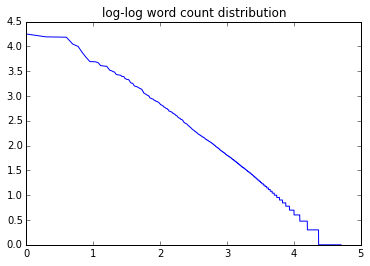

In [103]:
# sort them
indexer = sorted(range(len(allcountsList)), key=lambda k: allcountsList[k], reverse=True)
allcountsListSorted = [allcountsList[i] for i in indexer]
allwordsListSorted = [allwordsList[i] for i in indexer]
print allcountsListSorted[0:10]
print allwordsListSorted[0:10]

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.plot(np.log10(range(len(allcountsListSorted))),np.log10(allcountsListSorted))
plt.title('log-log word count distribution')

In [104]:
print LIWCwords[0:10]
print LIWCscores[0:10]

# we can test coverage now anyway (the stems are the hardest part)
for i in xrange(len(allwordsListSorted)):
    word = allwordsListSorted[i]

['126', '127', "abandon[a-z']*", "abuse[a-z']*", "abusi[a-z']*", 'accept', "accepta[a-z']*", 'accepted', 'accepting', 'accepts']
[1, -1, -1, -1, -1, 1, 1, 1, 1, 1]


In [133]:
# load all of the lists of words
# sort by valence if more than just +1/-1
# else sort by alphabetical

# cheat on loading the labMT list
from labMTsimple.storyLab import emotionFileReader
lang = "english"
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,fileName='labMT2'+lang+'.txt',returnVector=True)
print len(labMT)
labMTscores = labMTvector
labMTwords = labMTwordList
labMTwords[labMTwords.index("*estimated")] = "\*estimated"
labMTwords[labMTwords.index("**municipal")] = "\*\*municipal"
labMTwordsRE = map(re.compile,map(lambda x: "^"+x+"$",labMTwords))

ANEW = dict()
f = open("ANEW/all.csv")
f.readline()
for line in f:
    l = line.rstrip().split(",")
    ANEW[l[0]] = l[1:]
f.close()
print len(ANEW)
ANEWwords = [key for key in ANEW]
ANEWscores = [float(ANEW[word][1]) for word in ANEWwords]
# sort by valence
indexer = sorted(range(len(ANEWscores)), key=lambda k: ANEWscores[k], reverse=True)
ANEWwords = [ANEWwords[i] for i in indexer]
ANEWscores = [ANEWscores[i] for i in indexer]
ANEWwordsRE = map(re.compile,map(lambda x: "^"+x+"$",ANEWwords))

# many (most) of these words are stems
# so we'll need to deal with this in applying it
LIWC = dict()
f = open("LIWC/LIWC2007_positive.txt")
for line in f:
    l = line.rstrip().split("\t")
    LIWC[l[0].replace('*','[a-z\']*')] = 1
f.close()
f = open("LIWC/LIWC2007_negative.txt")
for line in f:
    l = line.rstrip().split("\t")
    LIWC[l[0].replace('*','[a-z\']*')] = -1
f.close()
print len(LIWC)
# get the words out...go alphabetical
LIWCwords = [key for key in LIWC]
LIWCwords.sort()
# same order
LIWCscores = [LIWC[word] for word in LIWCwords]
LIWCwordsRE = map(re.compile,map(lambda x: "^"+x+"$",LIWCwords))

# found a typo in the following dataset (fixed)
# (pyenv)happy% grep -n "n m" MPQA-lexicon/subjectivity_clues_hltemnlp05/subjclueslen1-HLTEMNLP05.tff
# 5549:type=strongsubj len=1 word1=pervasive pos1=adj stemmed1=n m priorpolarity=negative
# 5550:type=strongsubj len=1 word1=pervasive pos1=noun stemmed1=n m priorpolarity=negative
#
# also, there are words that are the same word
# but with a different usage type (adj,noun)
# i'm only keeping the latter
MPQA = dict()
f = open("MPQA-lexicon/subjectivity_clues_hltemnlp05/subjclueslen1-HLTEMNLP05.tff","r")
for line in f:
    # print line
    l = [x.split("=")[1] for x in line.rstrip().split(" ")]
    # check that no words are different polarity when duplicated
    if l[2] in MPQA:
        if not MPQA[l[2]]["polarity"] == l[5]:
            print l[2]+" is both "+MPQA[l[2]]["polarity"]+" and "+l[5]
            print "declaring it neutral"
            l[5] = "neutral"
    MPQA[l[2]] = {"type": l[0], "len": l[1], "pos1": l[3], "stemmed": (l[4]=="y"), "polarity": l[5]}
f.close()
print len(MPQA)
# grab all of the words that have a polarity
MPQAwords = []
scores = [-1,0,1]
emotions = ["negative","neutral","positive"]
for key in MPQA:
    if MPQA[key]["polarity"] in emotions:
        if MPQA[key]["stemmed"] == "y":
            MPQAwords.append(key+"[a-z]*")
        else:
            MPQAwords.append(key)
MPQAwords.sort()
MPQAscores = [scores[emotions.index(MPQA[key]["polarity"])] for key in MPQAwords]
MPQAwordsRE = map(re.compile,map(lambda x: "^"+x+"$",MPQAwords))

liu = dict()
f = open("liu-lexicon/negative-words-clean.txt","r")
for line in f:
    l = line.rstrip()
    liu[l] = -1
f.close()
f = open("liu-lexicon/positive-words-clean.txt","r")
for line in f:
    l = line.rstrip()
    liu[l] = 1
f.close()
print len(liu)
liuwords = [key for key in liu]
liuwords.sort()
liuscores = [liu[key] for key in liuwords]
liuwords[liuwords.index("bull****")] = "bull\*\*\*\*"
liuwords[liuwords.index("f**k")] = "f\*\*k"
liuwordsRE = map(re.compile,map(lambda x: "^"+x+"$",liuwords))

10222
1030
909
blood is both neutral and negative
declaring it neutral
boast is both positive and negative
declaring it neutral
conscience is both neutral and positive
declaring it neutral
deep is both neutral and negative
declaring it neutral
destiny is both positive and neutral
declaring it neutral
dig is both negative and positive
declaring it neutral
excuse is both negative and positive
declaring it neutral
fine is both positive and negative
declaring it neutral
fun is both negative and positive
declaring it neutral
intimate is both positive and neutral
declaring it neutral
intrigue is both positive and neutral
declaring it neutral
keen is both positive and negative
declaring it neutral
keen is both neutral and negative
declaring it neutral
large is both neutral and positive
declaring it neutral
large is both neutral and positive
declaring it neutral
mean is both negative and neutral
declaring it neutral
might is both neutral and positive
declaring it neutral
need is both negative 

In [106]:
print ANEWwords[0:10]
print ANEWscores[0:10]
print ANEWwords[-10:]
print ANEWscores[-10:]

['triumphant', 'love', 'paradise', 'loved', 'joy', 'miracle', 'humor', 'laughter', 'champion', 'friendly']
[8.82, 8.72, 8.72, 8.64, 8.6, 8.6, 8.56, 8.45, 8.44, 8.43]
['death', 'unhappy', 'torture', 'suffocate', 'murderer', 'rejected', 'cancer', 'funeral', 'suicide', 'rape']
[1.61, 1.57, 1.56, 1.56, 1.53, 1.5, 1.5, 1.39, 1.25, 1.25]


In [134]:
print MPQAwords[0:10]
print MPQAscores[0:10]
print MPQAwords[-10:]
print MPQAscores[-10:]
print len(MPQA)
print len(MPQAwords)

['abandon', 'abandoned', 'abandonment', 'abase', 'abasement', 'abash', 'abate', 'abdicate', 'aberration', 'abhor']
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
['yelp', 'yep', 'yes', 'youthful', 'zeal', 'zealot', 'zealous', 'zealously', 'zenith', 'zest']
[-1, 1, 1, 1, 1, -1, -1, -1, 1, 1]
6886
6869


In [108]:
print liuwords[0:10]
print liuscores[0:10]
print liuwords[-10:]
print liuscores[-10:]

['2-faced', '2-faces', 'a+', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort']
[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]
['zapped', 'zaps', 'zeal', 'zealot', 'zealous', 'zealously', 'zenith', 'zest', 'zippy', 'zombie']
[-1, -1, 1, -1, -1, -1, 1, 1, 1, -1]


In [109]:
print LIWCwords[0:10]
print LIWCwordsRE[0:10]
print LIWCwordsRE[2].match('abandoned')
print LIWCwordsRE[5].match('accepted')
print LIWCwordsRE[5].match('cept')
print LIWCwordsRE[7].match('accepted')

['126', '127', "abandon[a-z']*", "abuse[a-z']*", "abusi[a-z']*", 'accept', "accepta[a-z']*", 'accepted', 'accepting', 'accepts']
[<_sre.SRE_Pattern object at 0x1197f1328>, <_sre.SRE_Pattern object at 0x1197f10c8>, <_sre.SRE_Pattern object at 0x1126ee120>, <_sre.SRE_Pattern object at 0x116ff99d0>, <_sre.SRE_Pattern object at 0x110f34b90>, <_sre.SRE_Pattern object at 0x12425f3a0>, <_sre.SRE_Pattern object at 0x1126ee210>, <_sre.SRE_Pattern object at 0x1198cf0f0>, <_sre.SRE_Pattern object at 0x123f7fe40>, <_sre.SRE_Pattern object at 0x119b460e8>]
None
None


In [173]:
# let's define some functions to make word vecs for any corpus
    
# assume that there is no overlap in the word definitions...
def matcherVec(REvector,word,wordVec):
    for i in xrange(len(REvector)):
        if REvector[i].match(word) is not None:
            wordVec[i] += 1
            break

def wordVecify(words,reVector):
    wordVec = [0 for i in xrange(len(reVector))]
    for word in words:
        matcherVec(reVector,word,wordVec)
    return wordVec

In [182]:
print len(poswords)
print len(LIWCwordsRE)
%timeit wordVecify(poswords[:1000],LIWCwordsRE)
a = wordVecify(poswords[:1000],LIWCwordsRE)
print len(a)
print max(a)
print sum(a)
# print a

686656
909
1 loops, best of 3: 333 ms per loop
909
4
60


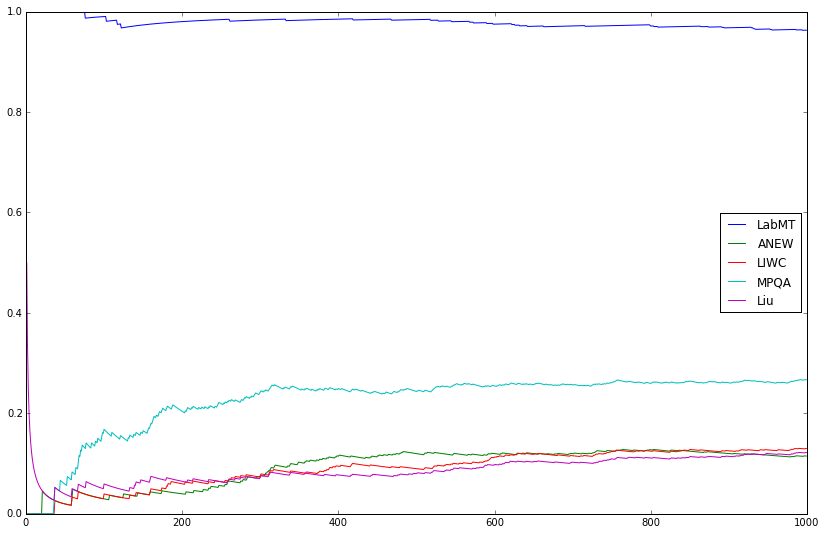

In [183]:
maxCount = 15000
def coverageMaker(wordList,REvector):
    a = [sum(wordVecify([word],REvector)) for word in wordList[:maxCount]]
    b = [float(sum(a[:i+1]))/(i+1) for i in range(maxCount)]
    return a,b

labMTcoverage,labMTcovP = coverageMaker(allwordsListSorted,labMTwordsRE)
ANEWcoverage,ANEWcovP = coverageMaker(allwordsListSorted,ANEWwordsRE)
LIWCcoverage,LIWCcovP = coverageMaker(allwordsListSorted,LIWCwordsRE)
MPQAcoverage,MPQAcovP = coverageMaker(allwordsListSorted,MPQAwordsRE)
liucoverage,liucovP = coverageMaker(allwordsListSorted,liuwordsRE)

plt.figure(num=None, figsize=(14, 9), dpi=600, facecolor='w', edgecolor='k')
plt.plot(range(maxCount),labMTcovP)
plt.plot(range(maxCount),ANEWcovP)
plt.plot(range(maxCount),LIWCcovP)
plt.plot(range(maxCount),MPQAcovP)
plt.plot(range(maxCount),liucovP)

plt.legend(['LabMT','ANEW','LIWC','MPQA','Liu'],loc="best")
plt.savefig('coverage-over-words-by-rank.png')
# i will say that this plot is unfair to MPQA because I have thrown out all of the words that their score is 0 for.
# had I done the same for labMT, it would have done much worse
# ...for the sake of the plot, I'll put the zeros back in for MPQA words labelled nuetral
# not a big boost for them, only another ~150 words

In [122]:
print labMTcoverage[:200]
print labMTcovP[:200]
print sum(labMTcoverage[:200])
print labMTwords[wordVecify(['the'],labMTwordsRE).index(1)]
print re.match('^t$','the')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [141]:
# total number of words out this far
# how many did each set get of the total words?
print sum(allcountsListSorted[:maxCount])
print sum([a*b for a,b in zip(labMTcoverage,allcountsListSorted[:maxCount])])
print sum([a*b for a,b in zip(labMTcoverage,allcountsListSorted[:maxCount])])/float(sum(allcountsListSorted[:maxCount]))

594796
528074
0.887823724437


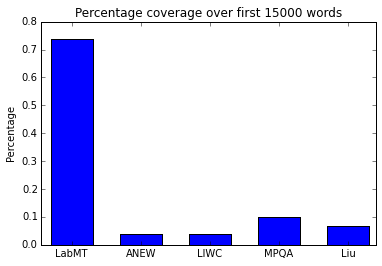

In [222]:
total = float(sum(allcountsListSorted[:maxCount]))
def totalCoverage(indices):
    return [a*b for a,b in zip(indices,allcountsListSorted[:maxCount])]

def covS(indices):
    return sum(totalCoverage(indices))/total

def relativeCoverage(indices):
    totalCov = totalCoverage(indices)
    return [sum(totalCov[:i+1])/float(sum(allcountsListSorted[:i+1])) for i in xrange(maxCount)]
    
coveragesBySet = map(covS,[labMTcoverage,ANEWcoverage,LIWCcoverage,MPQAcoverage,liucoverage])

ax = plt.subplot(111)
ax.bar(range(5),coveragesBySet,0.6,color='b')
ax.set_ylabel('Percentage')
ax.set_title('Percentage coverage over first '+str(maxCount)+' words')
ax.set_xlim([-.15,4.7])
ax.set_xticks(np.arange(5)+.3)
ax.set_xticklabels( ['LabMT','ANEW','LIWC','MPQA','Liu'] )

plt.savefig('total-coverage-bar-chart.png')

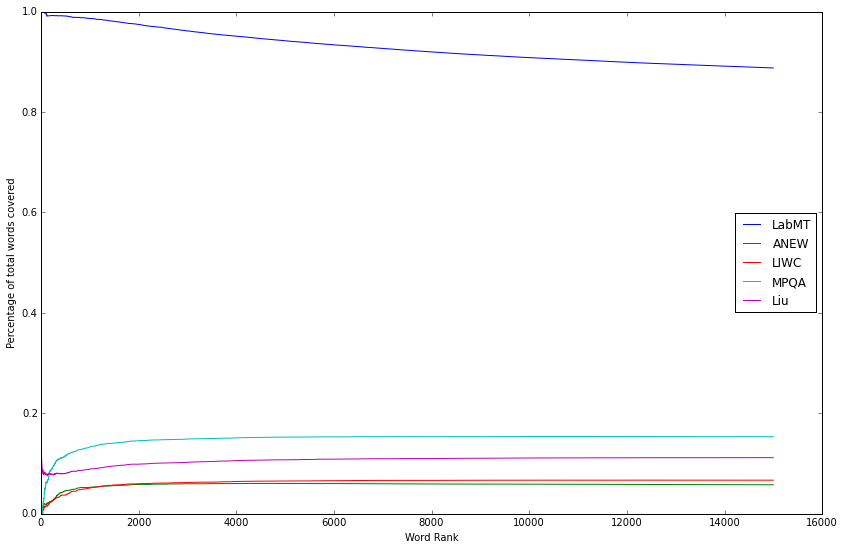

In [168]:
coveragesBySet = map(relativeCoverage,[labMTcoverage,ANEWcoverage,LIWCcoverage,MPQAcoverage,liucoverage])

plt.figure(num=None, figsize=(14, 9), dpi=600, facecolor='w', edgecolor='k')
plt.plot(range(maxCount),coveragesBySet[0])
plt.plot(range(maxCount),coveragesBySet[1])
plt.plot(range(maxCount),coveragesBySet[2])
plt.plot(range(maxCount),coveragesBySet[3])
plt.plot(range(maxCount),coveragesBySet[4])
plt.xlabel('Word Rank')
plt.ylabel('Percentage of total words covered')
plt.legend(['LabMT','ANEW','LIWC','MPQA','Liu'],loc="best")
plt.savefig('relative-coverage-over-words-by-rank.png')